**Name:** Harsh Agarwal
**MatrikelNummer:** 7024725
**Email:** haag00001@stud.uni-saarland.de
   
**Name:** Zurana Mehrin Ruhi
**MatrikelNummer:** 7023892
**Email:** zuru00001@stud.uni-saarland.de

# 3.2 Model Capacity, Underfitting and Overfitting (3 points)
In chapter 4 we have seen the concept of regularization that is added to the criterion. In this exercise we are going to study the effect of regularization.
Given training dataset $D = \{x_i,y_i\}_{i=1}^n$ where $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$ the ordinary linear least square regression minimizes the cost function 
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2$  
But sometimes this leads to overfitting or ill posed problems hence we add a regularizational term to the objective function  
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2 + \lambda \sum_{i=1}^d w_i^2$  
In practice we artificially add another dimension of 1's to $X$ to absorb the offset term b such that the objective function in matrix vector form becomes  
$f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ where
    $
        X = \begin{bmatrix}
    X_{1,1} & \cdots & X_{1,d} & 1\\
    X_{2,1}  & \cdots & X_{2,d} & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    X_{n,1} & \cdots & X_{n,d} & 1
    \end{bmatrix}
    $
 and $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$. We are going to derive the minimizing $w^*$ for this objective function as given in chapter 4 lecture slides. This is called ridge regression.

## 3.2a (1 point)
Derive the closed form of $w^*$ which minimizes the objective function $f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $. Note: In the final expression for $w^*$ we write $n\lambda$ as $\lambda$ for computational convenience since it is just a constant. 

Solution: You can write the solution either in the pdf or here in Latex

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.random.seed(42)

## 3.2b (0.5 point)
Implement the fit() function in the ridge_regression class which takes three parameters X, Y and LAMBDA. The fit() function computes the minimizer $w^*$ as derived in 3.2a for the regularized mean squared error objective function. Store the value of $w^*$ in self.w  
Implement the predict() function that takes a matrix X and returns the predictions of the model on X and since the bias term is absorbed in $w$, please do not forget to add another dimension of 1's to X as described earlier in both the fit() and predict() functions. Assume that fit() is called before using predict(). 
**Use only basic matrix vector operations from numpy**

In [2]:
class ridge_regression:
    def __init__(self):
        self.w = None # self.w.shape = (d+1,)
    
    def fit(self, X, Y, LAMBDA = 0.1): 
        """
        args: X.shape = (n, d). We account for the bias parameter b in the 
                design matrix X by artificially adding another dimension
              Y.shape = (n, 1)
        returns: None
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X = np.column_stack((X, np.ones(len(X))))
        self.w  = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X) + LAMBDA * np.identity(X.shape[1])), np.transpose(X)), Y) # TODO: IMPLEMENT
    
    def predict(self, X):
        """
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X = np.column_stack((X, np.ones(len(X))))
        y_pred = np.matmul(X, self.w)
        
        return y_pred

## 3.2c (1 point) 
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 samples which is randomly split into 70 training samples and 30 test samples. In this exercise we assume $x_i \in \mathbb{R}^1$  
1. Use a scatter plot to visualize your training (X_train, y_train) and test data (X_test, y_test). Train your ridge regression model on the training data (X_train, y_train) and visualize the regression model for different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] using a line graph in the same plot. You can do this by using np.linspace and the predict function of your classifier. Use appropriate legend labels. 
2. For different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] find the mean squared error between the predicted values of test dataset X_test and true labels of the test set. Plot a graph with **log scaled** $\lambda$ values on X-axis and mean squared error on Y-axis. You may use sklearn.metrics.mean_squared_error()

How does changing the values of $\lambda$ affect the error of the model?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a dummy regression dataset with noise
X , y = make_regression(n_samples = 100, n_features = 1, noise = 10)
print(X.shape, y.shape)

# Split the dataset into 70 training samples and 30 test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Different regularization coefficient values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Use the log scaled values of lambda for plotting
log_scale = [-3, -2, -1, 0, 1, 2, 3]

(100, 1) (100,)
(70, 1) (70,) (30, 1) (30,)


In [4]:
# TODO: Supply your code for 3.2c

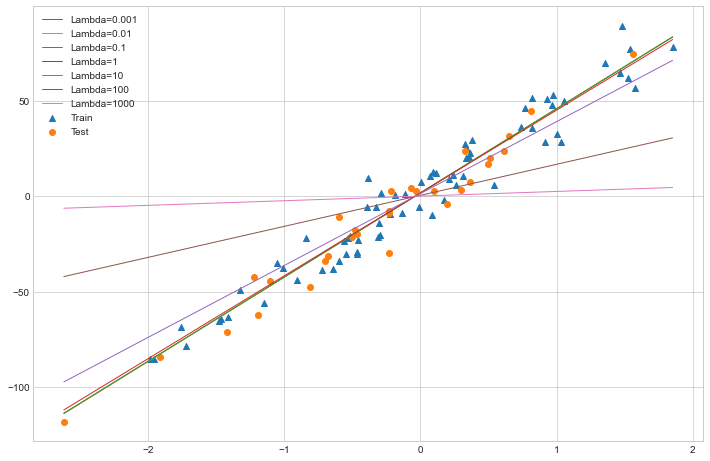

In [5]:
X_sample = np.linspace(min(X), max(X), 100)

plt.rcParams["figure.figsize"] = (12, 8)
plt.scatter(X_train, y_train, marker='^', label="Train")
plt.scatter(X_test, y_test, marker='o', label="Test")
for L in lambda_values:
    rr = ridge_regression()
    rr.fit(X_train, y_train, LAMBDA = L)
    plt.plot(X_sample, rr.predict(X_sample), linewidth=1, label="Lambda="+str(L)) 
plt.legend()
plt.show()

In [6]:
y_pred_dict = {}
for L in lambda_values:
    rr = ridge_regression()
    rr.fit(X_train, y_train, LAMBDA = L)
    y_pred_dict[L] = rr.predict(X_test)

Text(0, 0.5, 'Mean Squared Error')

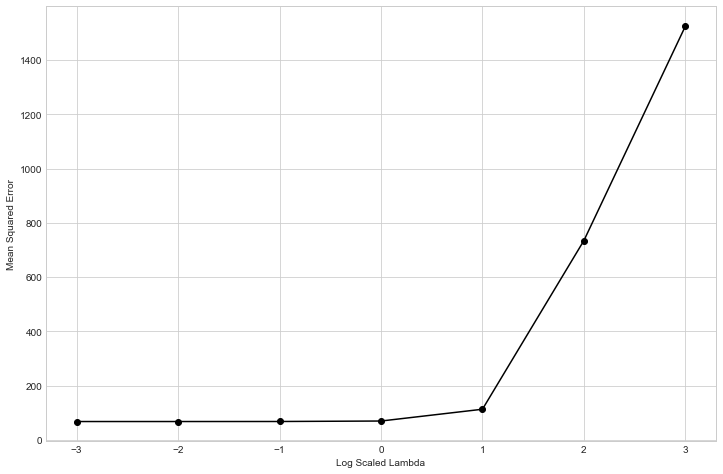

In [7]:
from sklearn.metrics import mean_squared_error
mse = np.array([mean_squared_error(y_test, y_pred_dict[L]) for L in lambda_values])
plt.plot(log_scale, mse, marker='o', color='black')
plt.axis('tight')
plt.xlabel('Log Scaled Lambda')
plt.ylabel('Mean Squared Error')

## 3.2d (0.5 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 training samples and in this exercise we will plot the weights of the model against different values of $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]. For this exercise we take the training samples $x_i \in \mathbb{R}^{10}$ i.e. d = 10. Since the bias term is absorbed in the parameter $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$ the dimension of $w$ is $d+1$. Therefore we will only consider the first $d$ values (d=10) of self.w  
  
Train the ridge regression model on the training set (X_train, y_train) for different values of $\lambda$.
Plot a graph with **log scaled** lambda values on X-axis and each $w_i$ on the Y-axis on the same plot. Explain what happens to the weight values and model capacity as you increase the regularization coefficient.

In [8]:
from sklearn.model_selection import train_test_split
X_train , y_train = make_regression(n_samples = 100, n_features = 10, noise = 10)
print(X_train.shape, y_train.shape)

(100, 10) (100,)


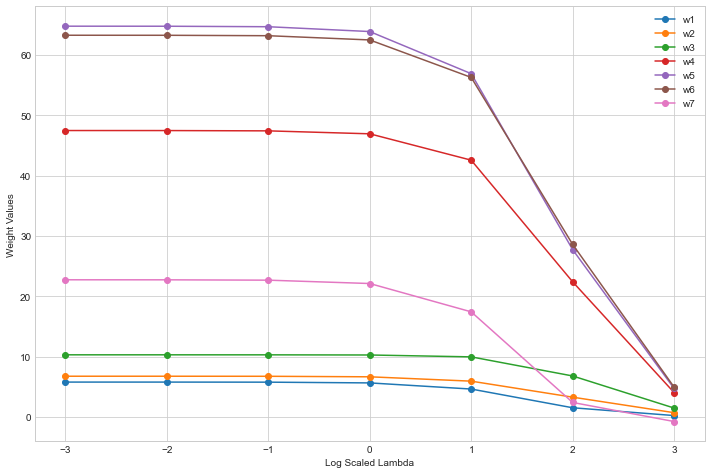

In [9]:
# TODO: Supply your code for 3.2d
weight_mat = np.empty((0,10))
for L in lambda_values:
    rr = ridge_regression()
    rr.fit(X_train, y_train, LAMBDA = L)
    weight_mat = np.vstack((weight_mat, rr.w[:-1]))

for i in range(len(lambda_values)):
    plt.plot(log_scale, weight_mat[:, i], marker='o', label="w"+str(i+1))
    plt.axis('tight') 
    plt.xlabel('Log Scaled Lambda')
    plt.ylabel('Weight Values') 
plt.legend()
plt.show()

**What happens to the weight values and model capacity as you increase the regularization coefficient?**

As we increase the regularization coefficients, optimization function will have to choose a smaller weight values in order to minimize the total cost. Therefore model weights decrease.

As we increase the regularization coefficients the model capacity increases as it tends to reduce overfitting and learns to better generalise. But when we use a very high value for these coefficients it starts negatively impacting the model capacity as the model tends to underfit.

## 3.2e (0.5 point)
Answer the following questions  
1. Explain the concept of overfitting and underfitting. 
2. Do you observe overfitting or underfitting for different values of λ in this exercise?

Solution:
1. **Overfitting:** When the trained model performs well on the training data, but it fails to generalize. This means that the training data accuracy is high but accuracy on test data (or unseen dataset) is much low   
   **Underfitting:** When the trained model performs poorly on both train as well as test data. This signifies that the model has not trained enough
   
   
2. As we increase the value of λ we observe underfitting. 